# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection

In [129]:
df = pd.read_csv('data/spam_or_not_spam.csv')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [130]:
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

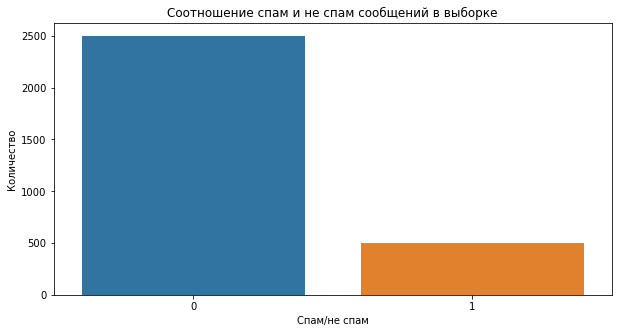

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

group_df = df.groupby('label').agg('count').reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=group_df, x='label', y='email', ax=ax)
ax.set_xlabel('Спам/не спам')
ax.set_ylabel('Количество')
ax.set_title('Соотношение спам и не спам сообщений в выборке')
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [133]:
df.isnull().sum()

email    1
label    0
dtype: int64

In [134]:
df = df.replace(' ', np.nan).dropna(axis=0)

print(df.isnull().sum())
df.shape[0]

email    0
label    0
dtype: int64


2997

Переводим данные в векторный вид:

In [135]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [136]:
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [137]:
y = df['label']

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [138]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [139]:
y_test.mean()

0.16565656565656567

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [140]:
from sklearn import naive_bayes

model = naive_bayes.ComplementNB(alpha=0.01)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [141]:
from sklearn import metrics

print('precision train - ', metrics.precision_score(y_train, y_train_predict))
print('recall train - ', metrics.recall_score(y_train, y_train_predict))
print('accuracy train - ', metrics.accuracy_score(y_train, y_train_predict))
print('f1 score train - ', metrics.f1_score(y_train, y_train_predict))

print('precision test - ', metrics.precision_score(y_test, y_test_predict))
print('recall test - ', metrics.recall_score(y_test, y_test_predict))
print('accuracy test - ', metrics.accuracy_score(y_test, y_test_predict))
print('f1 score test - ', metrics.f1_score(y_test, y_test_predict))

precision train -  1.0
recall train -  0.996996996996997
accuracy train -  0.9995017438963627
f1 score train -  0.9984962406015038
precision test -  0.9935483870967742
recall test -  0.9390243902439024
accuracy test -  0.9888888888888889
f1 score test -  0.9655172413793103


Нарисуйте ROC-кривую:

/home/vadim/anaconda3/envs/sf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


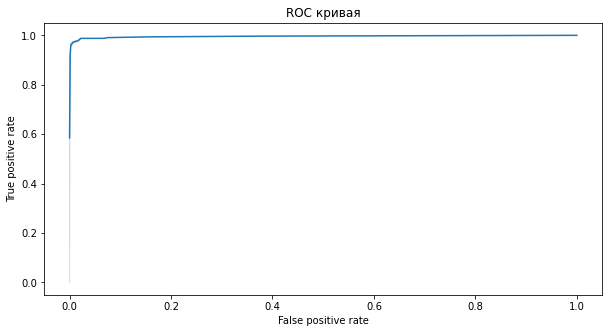

In [142]:
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = metrics.roc_auc_score(y_test, lr_probs)

fpr, tpr, threshold = metrics.roc_curve(y_test, lr_probs)
roc_auc = metrics.auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(fpr, tpr, ax=ax)

ax.set_title('ROC кривая')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
plt.show()



## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [143]:
alphas = [0.1, 0.05, 0.001, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]

for alpha in alphas:
    kf = model_selection.KFold(n_splits=5)
    model = naive_bayes.ComplementNB(alpha=alpha)
    
    cv_metrics = model_selection.cross_validate(
        estimator=model,
        cv=kf,
        X=X,
        y=y,
        scoring='accuracy',
        return_train_score=True
    )
    
    print('alpha - ', alpha)
    print('test metrics - ', cv_metrics['test_score'])
    print('train accuracy', np.mean(cv_metrics['train_score']))
    print('test accuracy', np.mean(cv_metrics['test_score']))

alpha -  0.1
test metrics -  [0.975      0.995      0.98831386 0.97495826 0.17028381]
train accuracy 0.9989154151891977
test accuracy 0.8207111853088481
alpha -  0.05
test metrics -  [0.98       0.99833333 0.99165275 0.97829716 0.17028381]
train accuracy 0.9989154151891977
test accuracy 0.8237134112409571
alpha -  0.001
test metrics -  [0.98833333 0.99666667 0.9966611  0.97829716 0.17028381]
train accuracy 0.9994159713820757
test accuracy 0.8260484140233724
alpha -  0.02
test metrics -  [0.98       0.99833333 0.99165275 0.97829716 0.17028381]
train accuracy 0.9989154151891977
test accuracy 0.8237134112409571
alpha -  0.03
test metrics -  [0.98       0.99833333 0.99165275 0.97662771 0.17028381]
train accuracy 0.9989154151891977
test accuracy 0.8233795214245966
alpha -  0.04
test metrics -  [0.98       0.99833333 0.99165275 0.97662771 0.17028381]
train accuracy 0.9989154151891977
test accuracy 0.8233795214245966
alpha -  0.05
test metrics -  [0.98       0.99833333 0.99165275 0.97829716 0

В целом параметр alpha в данном случае практически не влияет на качество модели.
Интересно, что при кроссвалидации в одном из вариантов разбития выборки, модель показывает очень сильное переобучение, что влияет на среднее по метрике